In [46]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [47]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

#Leaderboard
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



In [48]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [49]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [50]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [51]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

leaderAppID = leaderDf['application_key']
del leaderDf['application_key']
leaderX = leaderDf.copy()

In [52]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [53]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [54]:
gameX["mvar47"][0]

'C'

In [55]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])
leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [56]:
gameX["mvar47"].dtype

dtype('uint8')

# Synthesis begins

In [57]:
gameX['mvar5'] = (1+gameX['mvar3'])*(1+gameX['mvar4'])*(1+gameX['mvar5'])
leaderX['mvar5'] = (1+leaderX['mvar3'])*(1+leaderX['mvar4'])*(1+leaderX['mvar5'])

In [13]:
# gameX['mvar7'] = (gameX['mvar7'] + gameX['mvar8'])/(1+gameX['mvar6'])
# leaderX['mvar7'] = (leaderX['mvar7'] + leaderX['mvar8'])/(1+leaderX['mvar6'])

In [14]:
#drop
df = gameX.copy() 
leader_df = leaderX.copy()
drop_target = ['mvar3', 'mvar4']
#number of misssing values
# for i in df.columns:
#     if (100*(80000-gameDf[i].describe()['count'])/80000) > 

In [15]:
for i in drop_target:
    del df[i]
    del leader_df[i]

In [16]:
leader_df.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar7', 'mvar9', 'mvar10',
       'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15', 'mvar16', 'mvar17',
       'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22', 'mvar23', 'mvar24',
       'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30', 'mvar31',
       'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38',
       'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44', 'mvar45',
       'mvar46', 'mvar47'],
      dtype='object')

In [17]:
gameX = df
leaderX = leader_df 

# Synthesis Ends

In [58]:
#Missing values median
gameX.fillna(gameX.mean(),inplace = True)
leaderX.fillna(gameX.mean(),inplace = True)

# gameX.fillna(0,inplace = True)
# leaderX.fillna(0,inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.500100,0.000,0.0000,1.000000,206.000000,19179.000000,206.00000,14221.000000,19438.0,...,1.0,0.000000,98.497452,20.551000,0.42105,3.0,0.856610,0.070736,0.000000,0
1,1894.0,1.970100,0.000,0.0000,1.000000,297.000000,19820.000000,19820.00000,176895.000000,66346.0,...,3.0,0.000000,98.497452,63.047000,0.00000,15.0,0.943910,0.000000,0.000000,1
2,1774.0,0.171800,0.000,0.0000,1.000000,197.000000,2563.000000,877.00000,8869.000000,3637.0,...,1.0,0.000000,98.497452,83.797000,0.33333,3.0,0.764670,0.000000,0.000000,1
3,1586.0,0.112300,5.299,0.0000,6.299000,1606.702372,17595.807537,6773.68666,34097.436013,0.0,...,1.0,0.090819,98.497452,72.096758,1.50000,0.0,0.705285,0.070736,0.096135,1
4,1832.0,1.444200,0.000,0.0000,1.000000,179.000000,7577.000000,179.00000,21059.000000,20306.0,...,3.0,0.000000,96.052000,66.665000,0.00000,23.0,0.791900,0.000000,0.000000,0
5,1838.0,0.054400,0.241,0.0000,1.241000,882.000000,14039.000000,10976.00000,278941.000000,74030.0,...,4.0,0.000000,98.497452,77.780000,0.00000,21.0,0.924620,0.000000,0.000000,0
6,1743.0,1.075300,0.272,0.0000,1.272000,397.000000,16141.000000,3568.00000,69482.000000,56755.0,...,6.0,0.000000,98.497452,67.159000,0.00000,14.0,0.713470,0.000000,0.000000,0
7,1935.0,0.560100,0.000,0.0000,1.000000,496.000000,44919.000000,17115.00000,124814.000000,124167.0,...,9.0,0.000000,98.497452,72.096758,0.00000,15.0,0.924030,0.000000,0.000000,0
8,1885.0,0.081100,0.000,0.0000,1.000000,7369.000000,19264.000000,19264.00000,59956.000000,26633.0,...,1.0,0.000000,98.497452,72.096758,0.00000,5.0,0.897600,0.000000,0.096135,0
9,1730.0,0.744400,0.000,0.0000,1.000000,0.000000,2103.000000,582.00000,16429.000000,9197.0,...,9.0,0.000000,98.497452,72.096758,0.05882,14.0,0.405290,0.070736,0.000000,1


In [59]:
#LR

In [60]:
from sklearn import preprocessing as prep

scaler_list = []
for i in gameX.columns:
    scaler_list.append(prep.StandardScaler().fit(gameX[i]))
    
# prep.StandardScaler()

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [61]:
gameX_scaled = gameX.copy()

for i in enumerate(gameX_scaled.columns):
    gameX_scaled[i[1]] = scaler_list[i[0]].transform(gameX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [62]:
leaderX_scaled = leaderX.copy()

for i in enumerate(leaderX_scaled.columns):
    leaderX_scaled[i[1]] = scaler_list[i[0]].transform(leaderX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [63]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(gameX_scaled, gameY)

In [64]:
pred1 = clf.predict_proba(leaderX_scaled)

In [65]:
clf.coef_

array([[-0.23582355,  0.12953166, -0.04875857, -0.01738375, -0.00182671,
        -0.04350189,  0.10149808, -0.00258971,  0.08301553, -0.21012849,
        -0.00654917,  0.02451549, -0.08980141,  0.00791608, -0.03938662,
         0.01459083, -0.0348107 ,  0.09224181, -0.0444696 ,  0.09871372,
         0.04549177,  0.02622693,  0.03161885, -0.00422568, -0.0763556 ,
        -0.01610459,  0.00257668,  0.00839327, -0.04051574, -0.02666067,
        -0.02280583,  0.12437489, -0.02106459,  0.06638196,  0.0207511 ,
         0.08206717, -0.16373283,  0.04269839, -0.00288389,  0.0239    ,
         0.02367354,  0.13006866, -0.12285356, -0.02820426,  0.03403758,
         0.05603168,  0.2413562 ]])

In [66]:
clf.coef_.shape

(1, 47)

In [67]:
#Method 3

In [68]:
#current

In [69]:
import xgboost as xgb
import time


dtrain = xgb.DMatrix(gameX, gameY)
num_round = 1000
early_stopping_rounds = 50
n_fold = 5
watchlist = [(dtrain, 'eval'), (dtrain, 'train')]

print('running cross validation')

print('running cross validation, with preprocessing function')
# define the preprocessing function
# used to return the preprocessed training, test data, and parameter
# we can use this to do weight rescale, etc.
# as a example, we try to set scale_pos_weight
def fpreproc(dtrain, dtest, param):
    label = dtrain.get_label()
    ratio = float(np.sum(label == 0)) / np.sum(label == 1)
    param['scale_pos_weight'] = ratio
    return (dtrain, dtest, param)

# do cross validation, for each fold
# the dtrain, dtest, param will be passed into fpreproc
# then the return value of fpreproc will be used to generate
# results of that fold

###
# you can also do cross validation with customized loss function
# See custom_objective.py
##
print('running cross validation, with cutomsized loss function')
#Custom
# wt = 0.5
# def logregobj(preds, dtrain):
#     labels = dtrain.get_label()
#     preds = 1.0 / (1.0 + np.exp(-preds))
#     grad = wt*(1.0-labels)*preds - (1-wt)*labels*(1-preds)
#     hess = preds * (1.0 - preds) * (wt*(1.0-labels)+(1.0-wt)*labels)
#     return grad, hess

def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 1, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 1, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

t = time.time()
# CV to find optimum number of boosted trees (num_round)
# cvresult = xgb.cv(
#             param, #param set by user
#             dtrain, #train set
#             num_round, #max number of boosted tree, >early_stopping_round
#             nfold=n_fold, #n fold CV
#             seed=0, 
#             obj=logregobj, #custom loss func
#             feval=evalerror, #custom eval metric
#             callbacks=[xgb.callback.print_evaluation(show_stdv=False),
#                        xgb.callback.early_stop(early_stopping_rounds)], #decides optimum number of boosted trees, <num_round
# #             fpreproc=fpreproc, #function for preprocessing
#             )
# num_round = cvresult.shape[0] #optimum number of boosted trees

num_round = 231
# bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror, fpreproc=fpreproc)
bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror)

print("time taken:", time.time()-t)

running cross validation
running cross validation, with preprocessing function
running cross validation, with cutomsized loss function
[0]	eval-error:0.753788	train-error:0.753788
[1]	eval-error:0.753788	train-error:0.753788
[2]	eval-error:0.371475	train-error:0.371475
[3]	eval-error:0.28515	train-error:0.28515
[4]	eval-error:0.240187	train-error:0.240187
[5]	eval-error:0.215587	train-error:0.215587
[6]	eval-error:0.208287	train-error:0.208287
[7]	eval-error:0.205725	train-error:0.205725
[8]	eval-error:0.204187	train-error:0.204187
[9]	eval-error:0.202425	train-error:0.202425
[10]	eval-error:0.2015	train-error:0.2015
[11]	eval-error:0.200412	train-error:0.200412
[12]	eval-error:0.1995	train-error:0.1995
[13]	eval-error:0.198612	train-error:0.198612
[14]	eval-error:0.19775	train-error:0.19775
[15]	eval-error:0.197912	train-error:0.197912
[16]	eval-error:0.197213	train-error:0.197213
[17]	eval-error:0.1974	train-error:0.1974
[18]	eval-error:0.196725	train-error:0.196725
[19]	eval-error:0

[177]	eval-error:0.177962	train-error:0.177962
[178]	eval-error:0.177962	train-error:0.177962
[179]	eval-error:0.1779	train-error:0.1779
[180]	eval-error:0.177875	train-error:0.177875
[181]	eval-error:0.177625	train-error:0.177625
[182]	eval-error:0.177638	train-error:0.177638
[183]	eval-error:0.1776	train-error:0.1776
[184]	eval-error:0.177663	train-error:0.177663
[185]	eval-error:0.17775	train-error:0.17775
[186]	eval-error:0.177512	train-error:0.177512
[187]	eval-error:0.177475	train-error:0.177475
[188]	eval-error:0.177525	train-error:0.177525
[189]	eval-error:0.177525	train-error:0.177525
[190]	eval-error:0.1773	train-error:0.1773
[191]	eval-error:0.177275	train-error:0.177275
[192]	eval-error:0.17715	train-error:0.17715
[193]	eval-error:0.177113	train-error:0.177113
[194]	eval-error:0.177075	train-error:0.177075
[195]	eval-error:0.1769	train-error:0.1769
[196]	eval-error:0.176863	train-error:0.176863
[197]	eval-error:0.176625	train-error:0.176625
[198]	eval-error:0.176563	train-e

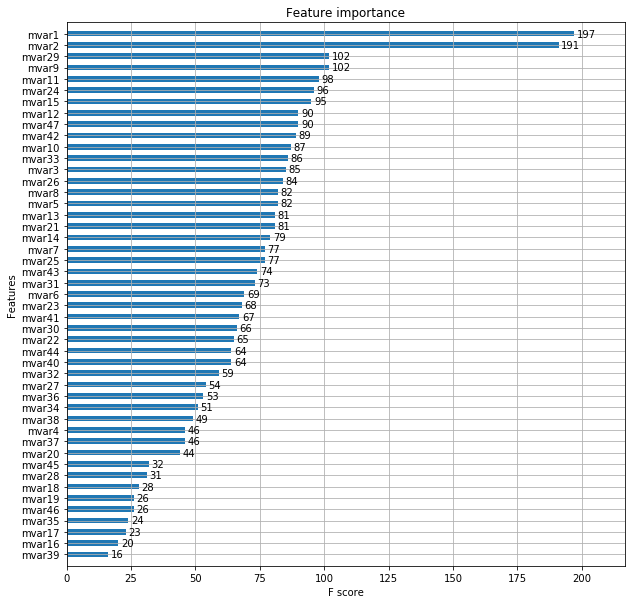

In [70]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(bst, height=0.5)
fig = ax.figure
fig.set_size_inches(10,10)
plt.show()

In [71]:
bst.predict(dtrain)

array([-0.67508328, -2.58654523, -1.09493172, ...,  0.72893643,
       -1.60282731, -0.70270526], dtype=float32)

In [72]:
1/(1+np.exp(-bst.predict(dtrain)))

array([ 0.33735952,  0.07000938,  0.25069073, ...,  0.67457181,
        0.16758683,  0.33121273], dtype=float32)

In [73]:
dtest = xgb.DMatrix(leaderX)
# pred = bst.predict(leaderXxgb)

In [74]:
pred2 = 1/(1+np.exp(-bst.predict(dtest)))

In [75]:
pred1 = pd.DataFrame(pred1)
pred1['application_key'] = leaderAppID
print(pred1.shape)

pred2= pd.DataFrame(pred2)
pred2['application_key'] = leaderAppID
pred2.shape

(25000, 3)


(25000, 2)

In [76]:
pred1

,0,1,application_key
0,0.827240,0.172760,350053
1,0.822618,0.177382,350054
2,0.706146,0.293854,350055
3,0.420136,0.579864,350056
4,0.813488,0.186512,350057
5,0.868751,0.131249,350058
6,0.815320,0.184680,350059
7,0.918796,0.081204,350060
8,0.892500,0.107500,350061
9,0.638756,0.361244,350062


In [77]:
pred2

,0,application_key
0,0.055334,350053
1,0.047736,350054
2,0.134715,350055
3,0.667950,350056
4,0.106750,350057
5,0.006533,350058
6,0.055654,350059
7,0.003625,350060
8,0.006699,350061
9,0.230308,350062


In [78]:
pred1 = pred1.sort_values(by = 0,kind = 'mergesort',ascending = False)

pred2 = pred2.sort_values(by = 0,kind = 'mergesort',ascending = True) #true for xgb method3

In [79]:
cols = pred1.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred1 = pred1[cols]

cols = pred2.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred2 = pred2[cols]

In [80]:
pred1 = pred1.loc[:,'application_key':]

pred2 = pred2.loc[:,'application_key':]

In [81]:
submit1 = pred1['application_key'][:10000]
submit1 = pd.DataFrame(submit1)
submit1[0] = 0

submit2 = pred2['application_key'][:10000]
submit2 = pd.DataFrame(submit2)
submit2[0] = 0

In [82]:
# submit.iloc[-400:, 1] = 1

In [83]:
submit1

,application_key,0
15911,365964,0
21128,371181,0
23338,373391,0
21040,371093,0
8558,358611,0
19140,369193,0
19883,369936,0
23607,373660,0
13848,363901,0
3642,353695,0


In [84]:
submit2

,application_key,0
124,350177,0
22865,372918,0
22631,372684,0
193,350246,0
190,350243,0
20330,370383,0
18109,368162,0
49,350102,0
3708,353761,0
3303,353356,0


In [85]:
no = 248

submit1.to_csv('flabbergasted_IITGuwahati_'+str(no)+'.csv',header = False, index = False)
submit2.to_csv('flabbergasted_IITGuwahati_'+str(no+1)+'.csv',header = False, index = False)

no+=2